![](https://paindoctor.com/wp-content/uploads/2018/01/ted-talks-on-health.png)

# TedTalk Data Analysis
----


# Part 1: Overview 
----

### About TED:

[TED](https://www.ted.com/talks) is a nonprofit devoted to spreading ideas, usually in the form of short, powerful talks (18 minutes or less). TED began in 1984 as a conference where **Technology, Entertainment** and **Design** converged, and today covers almost all topics — from science to business to global issues — in more than 100 languages.

In Vietnam, TED is popular among the youth who seeks for motivation or innovation, with many videos has been translated to Vietnamese. 

----
### Project goal

>* Analyze how TED performs throught time and how to improve it.
>* Find useful insights about the audience - how they think about the talks.
>* Show some other intersting figure about TED.

----
### Useful library for this project:
**`Matplotlib`**

**`Numpy`**

**`Pandas`** 

----

## Project Implement:
----

#### I. Read the dataset using `pandas` library and assign it to a dataframe:

```                                            
                                            import pandas as pd
                                            df = pd.read_csv('ted.csv')
                                            
```
    
* _Note that the dataset should be in the same directory with the Jupyter Notebook, otherwise pasting the address of the dataset between two quotes_ 

#### II. Print the first 5 row of the dataset:
```                                            
                                            df.head()
                                            
```

#### III. Check out some useful information about the dataset using: _`info()`, `describe()`, `mean()`, `min()`, `max()`, ... _
```                                            
                                            df.info()
                                            df.describe()
                                            ..........
                                            
```

#### IV. Replace missing values/NaN or outliers with suitable value: (using `drop()`, `isnull()`, `loc()`,...)
[Usefull Pandas techniques for Data Manipulation](https://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation/)

#### V. Analyze data statistics using `Pandas` and `Numpy`:
![Numpy Cheatsheet](https://intellipaat.com/mediaFiles/2018/12/Python-NumPy-Cheat-Sheet-1.png)

#### VI. Using those statictics to complete these tasks:
* What are the most welcome topic in TED.
* Evaluate TED performances throught time.
* Find any interesting facts about TED.


https://datastudio.google.com/s/qtQGMx8yYI0


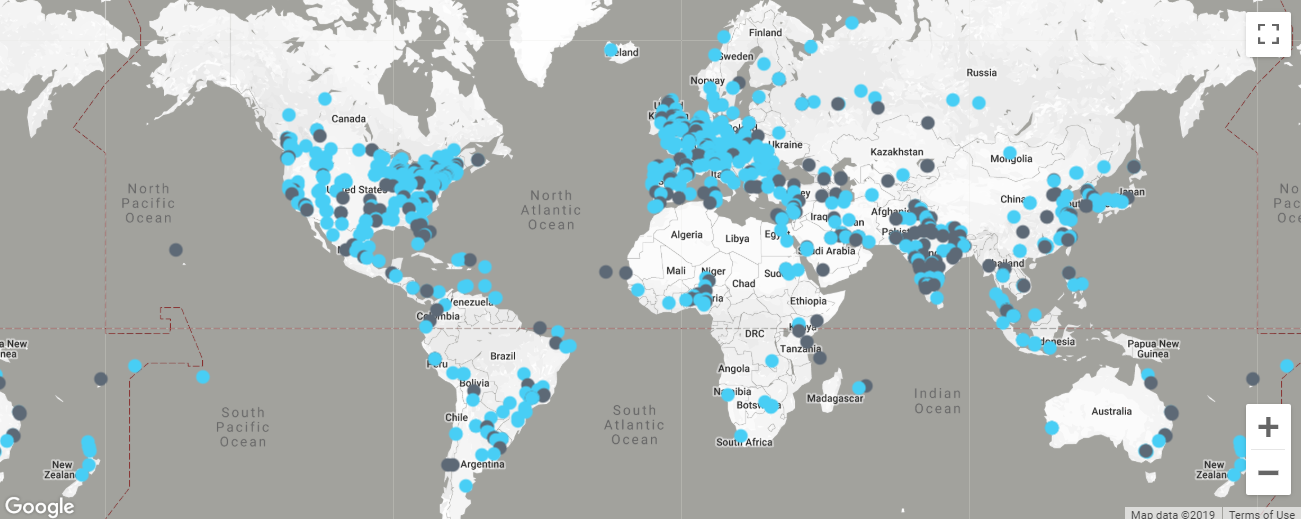

# Data Analysis
------

### Import libraries

In [1]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
%matplotlib inline

---
### Read the dataset

In [2]:
ted_df = pd.read_csv('ted.csv')

In [3]:
ted_df.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views'],
      dtype='object')

#### Meaning of each column:

* __comments__: The number of first level comments made on the talk
* __description__: A blurb of what the talk is about
* __duration__: The duration of the talk in seconds
* __event__: The TED/TEDx event where the talk took place
* __film_date__: The Unix timestamp of the filming
* __languages__: The number of languages in which the talk is available
* __main_speaker__: The first named speaker of the talk
* __name__: The official name of the TED Talk. Includes the title and the speaker.
* __num_speaker__: The number of speakers in the talk
* __published_date__: The Unix timestamp for the publication of the talk on TED.com
* __ratings__: A stringified dictionary of the various ratings given to the talk (inspiring, fascinating, jaw dropping, etc.)
* __related_talks__: A list of dictionaries of recommended talks to watch next
* __speaker_occupation__: The occupation of the main speaker
* __tags__: The themes associated with the talk
* __title__: The title of the talk
* __url__: The URL of the talk
* __views__: The number of views on the talk 


## Phase 1: Overview of the dataset
---

#### Now let's take a quick look into the dataset using _`head()`, `tail()`, `sample()`,..._ 

In [4]:
ted_df.head(3)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292


#### We might observed that the format of filmed date and pulished day aren't easy to understand, so we need to change it to the format that we are familiar with

In [5]:
ted_df['film_date'] = ted_df['film_date'].apply(lambda x: datetime.datetime.fromtimestamp(x).strftime("%d/%m/%Y"))

In [6]:
ted_df['published_date'] = ted_df['published_date'].apply(lambda x: datetime.datetime.fromtimestamp(x).strftime("%d/%m/%Y"))

#### Furthermore, the ratings, related talks and tags aren't in the format we want either (should be a list, not a really long string), but we'll come back to them later.

#### Now let's see how many ted talks session happend each year.

In [7]:
year = ted_df['film_date'].apply(lambda x: x[-4:])

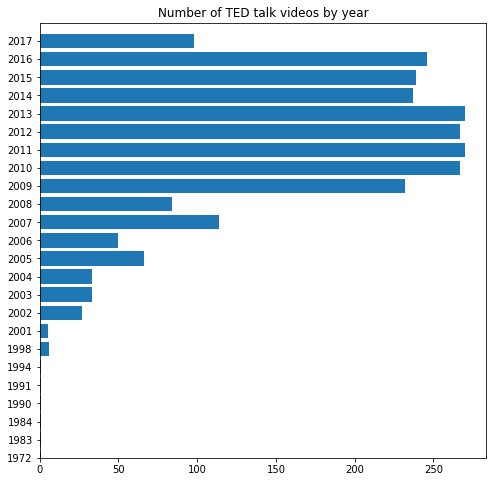

In [8]:
plt.figure(figsize=(8,8))
plt.barh(sorted(year.unique()), year.value_counts().sort_index())
plt.title('Number of TED talk videos by year')
plt.ylim(1972, 24)
plt.show()

Starting from 1972, but it's not until 2009 that **TED** has started to explode in the number of talks with around 250 talks each year. But these number drop a little bit since 2014.

#### In this project, I focus on the views as it will be the measure for success of one talk. So I wonder what top-5 TED videos in term of views look like?

In [9]:
ted_df[['views', 'name', 'event', 'film_date', 'published_date', 'main_speaker', 'duration', 'comments','languages']].sort_values('views', ascending=False).head()

,views,name,event,film_date,published_date,main_speaker,duration,comments,languages
0,47227110,Ken Robinson: Do schools kill creativity?,TED2006,25/02/2006,27/06/2006,Ken Robinson,1164,4553,60
1346,43155405,Amy Cuddy: Your body language may shape who yo...,TEDGlobal 2012,26/06/2012,01/10/2012,Amy Cuddy,1262,2290,51
677,34309432,Simon Sinek: How great leaders inspire action,TEDxPuget Sound,17/09/2009,04/05/2010,Simon Sinek,1084,1930,45
837,31168150,Brené Brown: The power of vulnerability,TEDxHouston,06/06/2010,23/12/2010,Brené Brown,1219,1927,52
452,22270883,Mary Roach: 10 things you didn't know about or...,TED2009,06/02/2009,20/05/2009,Mary Roach,1003,354,37


What interests me is that the champion video was made since 2006 and it's the only in top-5 that was filmed before 2009 (we have seen that from 2009 the number of talks each year began to explode).

Some other observations can be plotted:
* The second most view video was just 4 million views behind the first, but 9 million more than the third.
* The duration of top-5 was between 16 to 21 minutes.
* It seems like the views and comments/languages are proportional. We could see if they are truly correlation using `corr()` function 

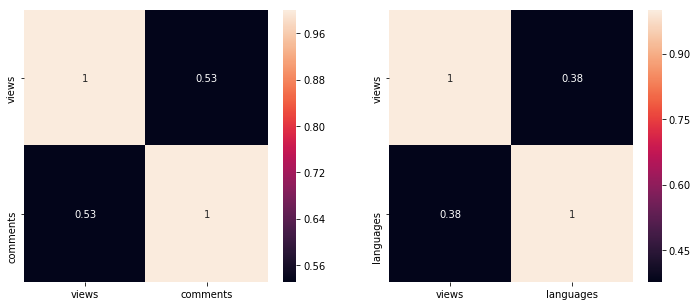

In [10]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.heatmap((ted_df[['views', 'comments']]).corr(), annot=True)
plt.subplot(1,2,2)
sns.heatmap((ted_df[['views', 'languages']]).corr(), annot=True)
plt.show()

There are clear proportionality between views and comments. The same pattern happened to views and languages but not really strong.

For the next, I will dive deep into the dataset to find some interesting figure about TED over the years.

## Phase 2: TED over years
----

#### In order to analysize TED's performance throught time, first we need to know if there are any missing values, unworkable column formats or outliers that appeared in the dataset.

#### The first useful function you could use for this task is `info()` and `describe()`

In [11]:
ted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
comments              2550 non-null int64
description           2550 non-null object
duration              2550 non-null int64
event                 2550 non-null object
film_date             2550 non-null object
languages             2550 non-null int64
main_speaker          2550 non-null object
name                  2550 non-null object
num_speaker           2550 non-null int64
published_date        2550 non-null object
ratings               2550 non-null object
related_talks         2550 non-null object
speaker_occupation    2544 non-null object
tags                  2550 non-null object
title                 2550 non-null object
url                   2550 non-null object
views                 2550 non-null int64
dtypes: int64(5), object(12)
memory usage: 338.8+ KB


#### Our film_date, published_day and views don't have missing values (that's a good sign)

*Althougth the dataset have 6 missing values in `speaker_occupation`, since it's not an important feature I wil just leave them there for now.*

#### First we create a new row `published_year` to plot the views throught years.

In [12]:
ted_df.loc[:,'published_year'] = ted_df['published_date'].apply(lambda x: x[-4:]) 

In [13]:
ted_df.loc[:,'film_year'] = ted_df['film_date'].apply(lambda x: x[-4:]) 

In [14]:
total_view_per_published_year = ted_df.groupby('published_year').sum()['views']

In [15]:
ted_df['views'].sum()//2500

1732263

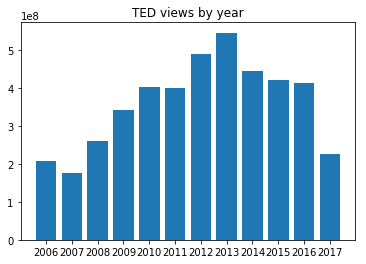

In [16]:
plt.bar(total_view_per_published_year.index, total_view_per_published_year)
plt.title('TED views by year')
plt.show()

Here we observed the same pattern in `Phase 1` where the number of views drop a little since 2014. There might be several causes for this drop, hense the most important reason is the reduce in number of videos.

Now I will look further to see TED performance follow by year and its season.

In [17]:
def season(x):
    month = int(x[3:5])
    if 1<=month<=3:
        return 'spring'
    elif 4<=month<=6:
        return 'summer'
    elif 7<=month<=9:
        return 'autumn'
    else:
        return 'winter'
    
def year_season(x):
    month = int(x[3:5])
    if 1<=month<=3:
        return x[-4:] + '-s1'
    elif 4<=month<=6:
        return x[-4:] + '-s2'
    elif 7<=month<=9:
        return x[-4:] + '-s3'
    else:
        return x[-4:] + '-s4'

def return_month_from_year_season(x):
    season = ['spring', 'summer', 'autumn', 'winter']
    return season[int(x[-1])-1]

In [18]:
ted_df['published_season'] = ted_df.published_date.apply(lambda x: season(x))

In [19]:
ted_df['published_year_season'] = ted_df.published_date.apply(lambda x: year_season(x))

In [20]:
year_season = ted_df.groupby('published_year_season').sum()[:]

In [21]:
year_season.head()

,comments,duration,languages,num_speaker,views
published_year_season,,,,,
2006-s2,6407,7038,248,6,86452742
2006-s3,8346,30348,724,25,82090156
2006-s4,3418,20194,548,19,38005433
2007-s1,2136,13493,308,13,18390770
2007-s2,13731,53219,1445,61,75374630


In [22]:
year_season.loc[:, 'season'] = [return_month_from_year_season(x) for x in year_season.index.values]
year_season.loc[:, 'year'] = [int(x[:4]) for x in year_season.index.values]

In [23]:
year_season.head()

,comments,duration,languages,num_speaker,views,season,year
published_year_season,,,,,,,
2006-s2,6407,7038,248,6,86452742,summer,2006
2006-s3,8346,30348,724,25,82090156,autumn,2006
2006-s4,3418,20194,548,19,38005433,winter,2006
2007-s1,2136,13493,308,13,18390770,spring,2007
2007-s2,13731,53219,1445,61,75374630,summer,2007


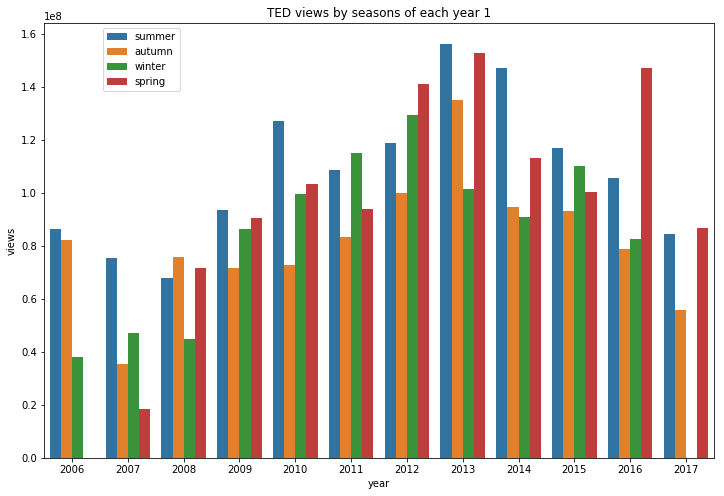

In [24]:
plt.figure(figsize=(12,8))
sns.barplot('year', 'views', hue = 'season', data=year_season)
plt.title('TED views by seasons of each year 1')
plt.legend(bbox_to_anchor=(0.08,1))
plt.show()

* It's quite hard to plot anything from this chart. I'll try to make another charts such that it's easy to understand. 

In [25]:
view_by_season = ted_df.groupby('published_season').sum()[:]
view_by_season_final = np.array([view_by_season[view_by_season.index.values == 'spring'].values, view_by_season[view_by_season.index.values == 'summer'].values, view_by_season[view_by_season.index.values == 'autumn'].values, view_by_season[view_by_season.index.values == 'winter'].values])

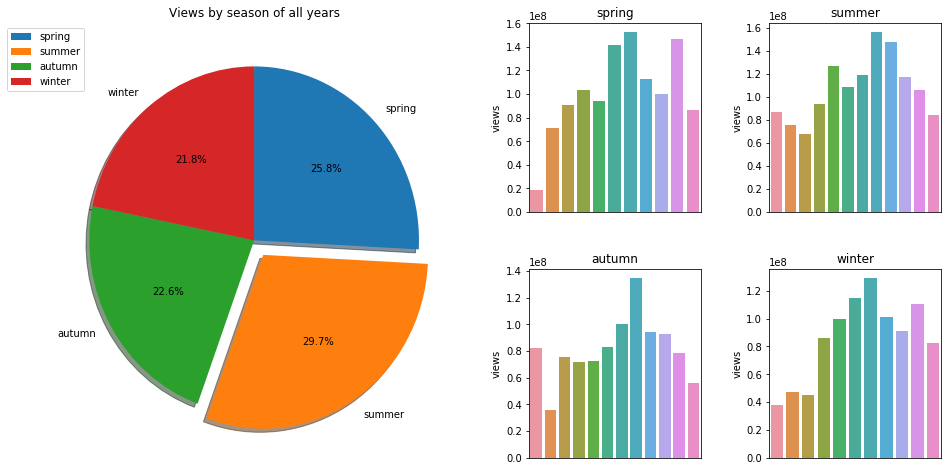

In [26]:
grid = plt.GridSpec(2, 4, wspace=0.4, hspace=0.3)
plt.figure(figsize=(16,8))
plt.subplot(grid[:, :2])
plt.pie(view_by_season_final[:,0, 4], explode=(0,0.1,0,0), labels = ['spring', 'summer', 'autumn', 'winter'], autopct='%1.1f%%', shadow=True, startangle=90, counterclock=False)
plt.title('Views by season of all years')
plt.legend(bbox_to_anchor=(0.1,1))
plt.subplot(grid[0, 2])
sns.barplot('year', 'views', data=year_season[year_season.season=='spring'])
plt.title('spring')
plt.xticks([])
plt.xlabel('')
plt.subplot(grid[0, 3])
sns.barplot('year', 'views', data=year_season[year_season.season=='summer'])
plt.title('summer')
plt.xticks([])
plt.xlabel('')
plt.subplot(grid[1, 2])
sns.barplot('year', 'views', data=year_season[year_season.season=='autumn'])
plt.title('autumn')
plt.xticks([])
plt.xlabel('')
plt.subplot(grid[1, 3])
sns.barplot('year', 'views', data=year_season[year_season.season=='winter'])
plt.title('winter')
plt.xticks([])
plt.xlabel('')
plt.show()

__ Follow this plot, we could observed some pattern __ :
* The views of each season follow the same pattern of the total views, with all reach the high in 2013 and then drop a little.
* TED get most views from summer, follow by spring, and fluctuate between autumn and winter. 
* It's worth noting that compare to the views in summer and autumn, the views in spring and winter has seen a large fluatuate over years. We'll see more clearly after taking a look at the seperate plot for each season.  

We have just done some evaluation about TED video base on views throught time, but is it the only factor (or at least strong correlated factor) that represent how good one talk is? Do the more views means that the more the audience feeling happy? 

We gonna try to answer these question by looking at how audiences react on TED videos!


## Phase 3: Audience Insights
----

#### In _Phase 1_, We had known that the ratings, related talks and tags weren't in the format that we want . Let's make a function to break them down to a list in order to analysize them easier.

In [27]:
def clean_tags(s):
    return re.sub("'|\s", "", s[1:-1]).split(',')

def clean_ratings(s):
    rating = np.array((re.sub("'name':|'count':|'id':|\}|\{|'|\]|\[|\s", '', s)).split(',')).reshape(-1,3)
    return rating[:,1:]

In [28]:
ted_df['tags'] = ted_df['tags'].apply(lambda x: clean_tags(x))

In [29]:
ted_df['ratings'] =  ted_df['ratings'].apply(lambda x: clean_ratings(x))

In [30]:
ted_df.head(1)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,related_talks,speaker_occupation,tags,title,url,views,published_year,film_year,published_season,published_year_season
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,25/02/2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,27/06/2006,...,"[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"[children, creativity, culture, dance, educati...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,2006,2006,summer,2006-s2


In [31]:
rating_names_year = []
rating_values_year = []
for i in ted_df['ratings']:
    rating_names_year.append(i[:,0])
    rating_values_year.append(i[:,1])

In [32]:
rating_year_df = pd.DataFrame(rating_names_year)
rating_year_df['year'] = ted_df['published_year']
rating_year_df = rating_year_df.set_index('year').stack().reset_index()
rating_year_df['rating_value'] = np.reshape(rating_values_year, (-1,1))

In [33]:
inspiring_informative_fasinating_df = rating_year_df[((rating_year_df[0] == 'Inspiring') | (rating_year_df[0] == 'Informative') | (rating_year_df[0] == 'Fascinating'))]

In [34]:
inspiring_informative_fasinating_df.head()

,year,level_1,0,rating_value
6,2006,6,Informative,7346
7,2006,7,Fascinating,10581
13,2006,13,Inspiring,24924
20,2006,6,Informative,443
21,2006,7,Inspiring,413


In [36]:
rating_year_df = pd.DataFrame(pd.DataFrame(rating_names_year).stack(), columns=['rating_name_year'])
rating_year_df['rating_count'] = np.reshape(rating_values_year, (-1,1))
rating_year_df.loc[:, 'rating_count'] = rating_year_df['rating_count'].apply(np.int)
rating_year_df.head()

rating_name_year  rating_count
0 0            Funny         19645
  1        Beautiful          4573
  2        Ingenious          6073
  3       Courageous          3253
  4       Longwinded           387

In [37]:
rating_names = []
rating_values = []
for i in ted_df['ratings']:
    rating_names.append(i[:,0])
    rating_values.append(i[:,1])
rating_df = pd.DataFrame(pd.DataFrame(rating_names).stack(), columns=['rating_name'])
rating_df['rating_count'] = np.reshape(rating_values, (-1,1))
rating_df.loc[:, 'rating_count'] = rating_df['rating_count'].apply(np.int)
rating_df.head()

rating_name  rating_count
0 0       Funny         19645
  1   Beautiful          4573
  2   Ingenious          6073
  3  Courageous          3253
  4  Longwinded           387

Let's see what people think about TED by looking at top 3 rating

In [38]:
top_rating = rating_df.groupby('rating_name').sum().sort_values('rating_count')[::-1]
top_rating = top_rating.reset_index()

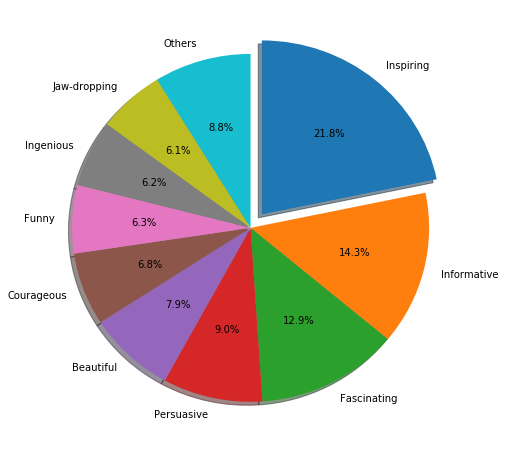

In [39]:
plt.figure(figsize=(8,8))
plt.pie(np.r_[top_rating[top_rating.index<=8]['rating_count'], np.array([top_rating[top_rating.index>8]['rating_count'].sum()])], labels=np.r_[top_rating[top_rating.index<=8]['rating_name'], np.array(['Others'])], explode=(0.1,0,0,0,0,0,0,0,0,0), autopct='%1.1f%%', shadow=True, startangle=90, counterclock=False)
plt.show()

The top of ratings is "Inspiring". This suggest that the Inspiring topic is quite common in TED. We'll see it when we dig into the Category of TED talks.

Now let's move to the Category

In [40]:
tags_name = []
for tag in ted_df['tags']:
    tags_name.append(tag)
tags_name[0]

['children',
 'creativity',
 'culture',
 'dance',
 'education',
 'parenting',
 'teaching']

In [41]:
ted_cat = pd.DataFrame(tags_name).stack().value_counts()
ted_cat.head(10)

technology       727
science          567
globalissues     501
culture          486
TEDx             450
design           418
business         348
entertainment    299
health           236
innovation       229
dtype: int64

Not surprisingly, Technology is top of the chart, follow by science. It's interesting to see that lobal issues make it way to top 3, and design which I'm not sure what it about. I will sample some topic that has tag "design" to know what it is.

In [42]:
design_index = []
for i in range(len(tags_name)):
    if 'design' in tags_name[i]:
        design_index.append(True)
    else:
        design_index.append(False)

In [45]:
ted_df[design_index].head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,related_talks,speaker_occupation,tags,title,url,views,published_year,film_year,published_season,published_year_season
7,46,Architect Joshua Prince-Ramus takes the audien...,1198,TED2006,23/02/2006,19,Joshua Prince-Ramus,Joshua Prince-Ramus: Behind the design of Seat...,1,10/07/2006,...,"[{'id': 750, 'hero': 'https://pe.tedcdn.com/im...",Architect,"[architecture, collaboration, culture, design,...",Behind the design of Seattle's library,https://www.ted.com/talks/joshua_prince_ramus_...,967741,2006,2006,autumn,2006-s3
10,79,"Accepting his 2006 TED Prize, Cameron Sinclair...",1414,TED2006,26/02/2006,27,Cameron Sinclair,Cameron Sinclair: My wish: A call for open-sou...,1,25/07/2006,...,"[{'id': 1749, 'hero': 'https://pe.tedcdn.com/i...","Co-founder, Architecture for Humanity","[activism, architecture, collaboration, cultur...",My wish: A call for open-source architecture,https://www.ted.com/talks/cameron_sinclair_on_...,1211416,2006,2006,autumn,2006-s3
13,242,"Jeff Han shows off a cheap, scalable multi-tou...",527,TED2006,06/02/2006,27,Jeff Han,Jeff Han: The radical promise of the multi-tou...,1,01/08/2006,...,"[{'id': 685, 'hero': 'https://pe.tedcdn.com/im...",Human-computer interface designer,"[demo, design, interfacedesign, technology]",The radical promise of the multi-touch interface,https://www.ted.com/talks/jeff_han_demos_his_b...,4531020,2006,2006,autumn,2006-s3
14,99,"Nicholas Negroponte, founder of the MIT Media ...",1057,TED2006,23/02/2006,25,Nicholas Negroponte,Nicholas Negroponte: One Laptop per Child,1,01/08/2006,...,"[{'id': 2043, 'hero': 'https://pe.tedcdn.com/i...",Tech visionary,"[children, design, education, entrepreneur, gl...",One Laptop per Child,https://www.ted.com/talks/nicholas_negroponte_...,358304,2006,2006,autumn,2006-s3
17,88,Fumes from indoor cooking fires kill more than...,906,TED2006,24/02/2006,27,Amy Smith,Amy Smith: Simple designs to save a life,1,15/08/2006,...,"[{'id': 1561, 'hero': 'https://pe.tedcdn.com/i...","inventor, engineer","[MacArthurgrant, alternativeenergy, design, en...",Simple designs to save a life,https://www.ted.com/talks/amy_smith_shares_sim...,1415724,2006,2006,autumn,2006-s3


The "Design" tag is really about art related field. It's surprise me that TED has lots of talks about this topic.

In [46]:
tags_year = []
for tag in ted_df['tags']:
    tags_year.append(tag)
tags_year[0]

['children',
 'creativity',
 'culture',
 'dance',
 'education',
 'parenting',
 'teaching']

In [43]:
ted_cat_by_year = pd.DataFrame(np.c_[pd.DataFrame(tags_name), ted_df['published_year']]).set_index(32, drop=True).stack().reset_index()
ted_cat_by_year.loc['year'] = ted_cat_by_year[32].apply(lambda x: x[0])
ted_cat_by_year.head()

,32,level_1,0
0,2006,0.0,children
1,2006,1.0,creativity
2,2006,2.0,culture
3,2006,3.0,dance
4,2006,4.0,education
